In [1]:



from scipy.stats.stats import pearsonr
import seaborn as sns
import pandas as pd;

import os; 
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf


so_happy2 = pd.read_csv("bigdaddy.txt.gct" , sep = '\t' , skiprows = 2  , index_col = 'Description' )


        

In [2]:
so_happy3 = so_happy2.drop('Name' , axis = 1).T
so_happy3.head()


Description,DDX11L1,WASH7P,MIR1302-11,FAM138A,OR4G4P,OR4G11P,OR4F5,RP11-34P13.7,CICP27,AL627309.1,...,MT-ND4,MT-TH,MT-TS2,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB,MT-TT,MT-TP
GTEX-1117F-0226-SM-5GZZ7,0.10820,21.400,0.16020,0.05045,0.0,0.00000,0.00000,0.23920,0.18690,9.467,...,12260.0,0.000,0.0000,0.0000,2894.0,3754.0,16.040,6856.0,0.9319,0.0000
GTEX-111CU-1826-SM-5GZYN,0.11580,11.030,0.06433,0.00000,0.0,0.10510,0.00000,0.07206,0.39590,8.643,...,22010.0,0.716,2.5120,0.6959,3859.0,3637.0,7.160,19180.0,0.0000,0.0000
GTEX-111FC-0226-SM-5N9B8,0.02104,16.750,0.04674,0.02945,0.0,0.07637,0.00000,0.20940,0.08927,2.386,...,27090.0,1.040,0.6084,0.0000,3322.0,3193.0,4.682,21450.0,0.0000,2.6390
GTEX-111VG-2326-SM-5N9BK,0.02329,8.172,0.00000,0.03260,0.0,0.00000,0.00000,0.23180,0.19770,31.610,...,18610.0,1.152,0.6735,0.0000,2313.0,2438.0,5.759,13020.0,0.6021,0.5844
GTEX-111YS-2426-SM-5GZZQ,0.00000,7.658,0.05864,0.00000,0.0,0.00000,0.09811,0.04379,0.06222,5.961,...,50960.0,1.305,0.7633,0.6343,5984.0,5230.0,31.330,37080.0,0.6823,1.9870


In [114]:
import scipy
import numpy
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import quantile_transform
quantile_transformer = power_transform(so_happy3 , method = 'yeo-johnson')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:2798: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:105: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


In [5]:
quantile_transformer = quantile_transform(so_happy3 , output_distribution='normal', random_state=0)

In [115]:
new_norm = pd.DataFrame(quantile_transformer)

In [117]:
new_norm.columns= gene_names

In [118]:
new_norm

,DDX11L1,WASH7P,MIR1302-11,FAM138A,OR4G4P,OR4G11P,OR4F5,RP11-34P13.7,CICP27,AL627309.1,...,MT-ND4,MT-TH,MT-TS2,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB,MT-TT,MT-TP
0,0.575071,1.208570,0.909206,0.370117,-0.979302,-1.173386,-1.242015,0.785507,0.329452,0.338181,...,-1.323718,-1.351674,-1.104244,-1.245966,-0.821382,-0.448291,-0.143446,-1.507169,0.254342,-1.737136
1,0.661416,-0.064874,0.155915,-1.280360,-0.979302,0.924395,-1.242015,-0.429447,1.133184,0.271553,...,-0.558212,0.035500,1.138604,0.196612,-0.429099,-0.478588,-0.621416,-0.133788,-1.266057,-1.737136
2,-0.560154,0.692695,-0.019955,0.043596,-0.979302,0.673239,-1.242015,0.602073,-0.835906,-0.651332,...,-0.228699,0.189718,0.335386,-1.245966,-0.636631,-0.604051,-0.826540,0.061512,-1.266057,0.281405
3,-0.519365,-0.550920,-1.317481,0.091181,-0.979302,-1.173386,-1.242015,0.743297,0.409752,1.149705,...,-0.802702,0.237136,0.381663,-1.245966,-1.093460,-0.860265,-0.731339,-0.709476,0.066538,-0.485746
4,-1.807357,-0.646753,0.098480,-1.280360,-0.979302,-1.173386,0.668323,-0.698353,-1.345453,0.000514,...,0.946236,0.300990,0.443052,0.152330,0.114534,-0.121424,0.365758,1.235759,0.116736,0.045508
5,-0.214608,-0.333840,-1.317481,-1.280360,-0.979302,0.282577,-1.242015,-0.387797,-1.483191,0.047545,...,0.543505,0.234667,0.379748,-1.245966,-0.062514,-0.140300,0.234470,1.079153,0.065039,-0.239288
6,-0.396755,-0.219364,0.730686,0.826484,1.303734,-1.173386,-1.242015,0.889877,-0.643605,0.709293,...,0.218582,-1.351674,-1.104244,-1.245966,-0.728968,-0.763996,-0.645788,0.302902,0.510715,-0.381749
7,0.397388,0.295456,1.258880,1.356693,0.860411,-1.173386,-1.242015,0.750403,-1.405383,-0.895544,...,-0.767000,0.069407,-1.104244,-1.245966,0.515152,0.988654,0.869216,-0.527106,1.613129,0.680719
8,0.721910,-0.247277,0.048297,0.580384,-0.979302,-1.173386,0.166563,-0.535720,-0.303477,-0.708688,...,0.556346,1.385427,-1.104244,-1.245966,-0.482057,-0.587854,-0.950429,0.608888,-1.266057,-0.012076
9,-0.429575,-0.380348,0.147681,-1.280360,-0.979302,0.416066,0.262202,1.322663,0.685292,-0.503334,...,0.364963,-1.351674,-1.104244,-1.245966,-0.164209,-0.193207,-0.405119,1.074672,-1.266057,-0.408959


In [148]:
so_happy3

Description,DDX11L1,WASH7P,MIR1302-11,FAM138A,OR4G4P,OR4G11P,OR4F5,RP11-34P13.7,CICP27,AL627309.1,...,MT-ND4,MT-TH,MT-TS2,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB,MT-TT,MT-TP
GTEX-1117F-0226-SM-5GZZ7,0.712930,1.209094,0.997920,0.309523,-5.199338,-5.199338,-5.199338,0.893073,0.345936,0.338536,...,-1.324424,-5.199338,-5.199338,-5.199338,-0.821907,-0.448415,-0.088563,-1.507846,0.115248,-5.199338
GTEX-111CU-1826-SM-5GZYN,0.797547,-0.064027,0.013553,-5.199338,-5.199338,0.967241,-5.199338,-0.467483,1.137453,0.271871,...,-0.558392,-0.159435,1.208228,-0.011276,-0.429358,-0.478736,-0.646885,-0.133882,-5.199338,-5.199338
GTEX-111FC-0226-SM-5N9B8,-0.944112,0.693778,-0.315740,-0.248266,-5.199338,0.637615,-5.199338,0.725702,-0.846030,-0.651724,...,-0.228696,0.104321,-0.024947,-5.199338,-0.637030,-0.604305,-0.903240,0.061513,-5.199338,0.392159
GTEX-111VG-2326-SM-5N9BK,-0.855287,-0.551099,-5.199338,-0.154576,-5.199338,-5.199338,-5.199338,0.855238,0.425914,1.150386,...,-0.803036,0.177304,0.064925,-5.199338,-1.094173,-0.860757,-0.783103,-0.709827,-0.225640,-0.836898
GTEX-111YS-2426-SM-5GZZQ,-5.199338,-0.647202,-0.087068,-5.199338,-5.199338,-5.199338,0.685205,-0.895835,-1.382207,0.000664,...,0.946598,0.271006,0.178167,-0.092666,0.114630,-0.121313,0.441121,1.236384,-0.127524,0.096318
GTEX-1122O-2026-SM-5NQ91,-0.275260,-0.333483,-5.199338,-5.199338,-5.199338,0.021594,-5.199338,-0.406063,-1.528279,0.047726,...,0.543789,0.173580,0.061288,-5.199338,-0.062531,-0.140201,0.310017,1.079690,-0.228653,-0.348867
GTEX-1128S-2126-SM-5H12U,-0.604570,-0.218773,0.798885,0.895780,1.405226,-5.199338,-5.199338,0.985042,-0.645631,0.709822,...,0.218773,-5.199338,-5.199338,-5.199338,-0.729429,-0.764395,-0.676851,0.303024,0.494971,-0.618545
GTEX-113IC-0226-SM-5HL5C,0.529364,0.296607,1.353862,1.453289,0.664463,-5.199338,-5.199338,0.861634,-1.445709,-0.896177,...,-0.767310,-0.097528,-5.199338,-5.199338,0.515497,0.989103,0.919453,-0.527378,1.698077,0.814242
GTEX-117YX-2226-SM-5EGJJ,0.855287,-0.246740,-0.180405,0.597216,-5.199338,-5.199338,-0.074386,-0.630189,-0.294328,-0.709135,...,0.556634,1.469908,-5.199338,-5.199338,-0.482352,-0.588094,-1.062477,0.609169,-5.199338,0.015683
GTEX-11DXW-0326-SM-5H11W,-0.669326,-0.380097,-0.000474,-5.199338,-5.199338,0.252311,0.095406,1.345904,0.698684,-0.503588,...,0.365200,-5.199338,-5.199338,-5.199338,-0.164293,-0.193143,-0.387078,1.075207,-5.199338,-0.673880


In [18]:
gene_names = so_happy3.columns.get_values()
gene_names

array(['DDX11L1', 'WASH7P', 'MIR1302-11', ..., 'MT-CYB', 'MT-TT', 'MT-TP'], dtype=object)

In [147]:
new_norm

,DDX11L1,WASH7P,MIR1302-11,FAM138A,OR4G4P,OR4G11P,OR4F5,RP11-34P13.7,CICP27,AL627309.1,...,MT-ND4,MT-TH,MT-TS2,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB,MT-TT,MT-TP
0,0.575071,1.208570,0.909206,0.370117,-0.979302,-1.173386,-1.242015,0.785507,0.329452,0.338181,...,-1.323718,-1.351674,-1.104244,-1.245966,-0.821382,-0.448291,-0.143446,-1.507169,0.254342,-1.737136
1,0.661416,-0.064874,0.155915,-1.280360,-0.979302,0.924395,-1.242015,-0.429447,1.133184,0.271553,...,-0.558212,0.035500,1.138604,0.196612,-0.429099,-0.478588,-0.621416,-0.133788,-1.266057,-1.737136
2,-0.560154,0.692695,-0.019955,0.043596,-0.979302,0.673239,-1.242015,0.602073,-0.835906,-0.651332,...,-0.228699,0.189718,0.335386,-1.245966,-0.636631,-0.604051,-0.826540,0.061512,-1.266057,0.281405
3,-0.519365,-0.550920,-1.317481,0.091181,-0.979302,-1.173386,-1.242015,0.743297,0.409752,1.149705,...,-0.802702,0.237136,0.381663,-1.245966,-1.093460,-0.860265,-0.731339,-0.709476,0.066538,-0.485746
4,-1.807357,-0.646753,0.098480,-1.280360,-0.979302,-1.173386,0.668323,-0.698353,-1.345453,0.000514,...,0.946236,0.300990,0.443052,0.152330,0.114534,-0.121424,0.365758,1.235759,0.116736,0.045508
5,-0.214608,-0.333840,-1.317481,-1.280360,-0.979302,0.282577,-1.242015,-0.387797,-1.483191,0.047545,...,0.543505,0.234667,0.379748,-1.245966,-0.062514,-0.140300,0.234470,1.079153,0.065039,-0.239288
6,-0.396755,-0.219364,0.730686,0.826484,1.303734,-1.173386,-1.242015,0.889877,-0.643605,0.709293,...,0.218582,-1.351674,-1.104244,-1.245966,-0.728968,-0.763996,-0.645788,0.302902,0.510715,-0.381749
7,0.397388,0.295456,1.258880,1.356693,0.860411,-1.173386,-1.242015,0.750403,-1.405383,-0.895544,...,-0.767000,0.069407,-1.104244,-1.245966,0.515152,0.988654,0.869216,-0.527106,1.613129,0.680719
8,0.721910,-0.247277,0.048297,0.580384,-0.979302,-1.173386,0.166563,-0.535720,-0.303477,-0.708688,...,0.556346,1.385427,-1.104244,-1.245966,-0.482057,-0.587854,-0.950429,0.608888,-1.266057,-0.012076
9,-0.429575,-0.380348,0.147681,-1.280360,-0.979302,0.416066,0.262202,1.322663,0.685292,-0.503334,...,0.364963,-1.351674,-1.104244,-1.245966,-0.164209,-0.193207,-0.405119,1.074672,-1.266057,-0.408959


In [188]:
gene_names = so_happy3.columns.get_values()
one_vector = new_norm[['FANCA' , 'FANCB',  'FANCC' , 'FANCE' , 'FANCF' , 'FANCG' , 'FANCM' , 'C17orf70' , 'C1orf86' , 'C19orf40' , 'FANCD2' , 'FANCI' , 'UBE2T' , 'FANCL' , 'WDR48' ,
                        'USP1' , 'UHRF1' ]]
temp_vec = pd.DataFrame(index = gene_names , columns = {0:'coeff' , 1: 'p-value'})
temp = []

for i in range(0, len(one_vector.columns.get_values())):
    x = one_vector.iloc[:, i]
    
    for i in range(0, new_norm.shape[1]):
        #another = so_happy3.iloc[:, i]  # problem is here. only storing one set of gene expression data ... solved, used temp array and append function to irterate through//
        t = pearsonr(x, new_norm.iloc[:, i])
        temp.append((t[0], t[1], gene_names[i]))
        

In [88]:
gene_names = so_happy3.columns.get_values()
one_vector = new_norm[['FANCA' , 'FANCB',  'FANCC' , 'FANCE' , 'FANCF' , 'FANCG' , 'FANCM' , 'C17orf70' , 'C1orf86' , 'C19orf40' , 'FANCD2' , 'FANCI' , 'UBE2T' , 'FANCL' , 'WDR48' ,
                        'USP1' , 'UHRF1']]
temp_vec = pd.DataFrame(index = gene_names , columns = {0:'coeff' , 1: 'p-value'})
temp = []

for i in range(0, len(one_vector.columns.get_values())):
    x = one_vector.iloc[:, i]
    
    for i in range(0, so_happy3.shape[1]):
        #another = so_happy3.iloc[:, i]  # problem is here. only storing one set of gene expression data ... solved, used temp array and append function to irterate through//
        t = pearsonr(x, so_happy3.iloc[:, i])
        temp.append((t[0], t[1], gene_names[i]))
        

In [189]:
corr_test = pd.DataFrame(temp)
corr_test2 = corr_test.rename(columns = {0:'coeff' , 1: 'p-value' , 2: 'gene'})
corr_test3 = corr_test2.sort_values(['p-value'])
#corr_test4 = corr_test3.dropna()

In [190]:
#corr_test4['p-value']!= 0.0
#corr_test5 = corr_test4[corr_test3['p-value']!= 0.0]
#(corr_test5.sort_values(['coeff'] , ascending = False)).to_csv('trying.txt' , sep = '\t')


fuck = corr_test3.sort_values(['coeff'] , ascending = False).dropna()



In [191]:
fuck.to_csv('normies4.txt' , sep = '\t')

In [260]:
model = smf.ols('FANCF ~ NFYB+CREM+VDR+E2F1+E2F7+FOXP3+FOXO3+FOXM1+HOXC9+VDR+ETS1+KDM5B +KDM6A+ KDM5A + TAF1 + E2F4 + YY1 + ATF2 + GABPA + ELF1 + CREB1 + NRF1 +BRCA1 + MAX + SIN3A' , data =  new_norm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  FANCF   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     971.7
Date:                Wed, 24 Apr 2019   Prob (F-statistic):               0.00
Time:                        17:48:36   Log-Likelihood:                -10165.
No. Observations:               11688   AIC:                         2.038e+04
Df Residuals:                   11663   BIC:                         2.056e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.943e-16      0.005  -3.63e-14      1.000      -0.010       0.010
NFYB           0.0812      0.010      8.104      0.000       0.062       0.101
CREM          -0.1351      0.008    -16.326      0.000      -0.151      -0.119
VDR            0.1394      0.010     13.959      0.000       0.120       0.159
E2F1          -0.0219      0.008     -2.714      0.007      -0.038      -0.006
E2F7           0.0869      0.009      9.787      0.000       0.069       0.104
FOXP3          0.1505      0.008     19.872      0.000       0.136       0.165
FOXO3         -0.2789      0.009    -29.792      0.000      -0.297      -0.261
FOXM1          0.1127      0.012      9.476      0.000       0.089       0.136
HOXC9         -0.0784      0.007    -10.752      0.000      -0.093      -0.064
ETS1          -0.1991      0.011    -18.934      0.000      -0.220      -0.178
KDM5B         -0.0328      0.014     -2.327      0.020      -0.060      -0.005
KDM6A          0.1143      0.012      9.917      0.000       0.092       0.137
KDM5A         -0.0529      0.017     -3.112      0.002      -0.086      -0.020
TAF1           0.1349      0.014      9.405      0.000       0.107       0.163
E2F4           0.3151      0.010     31.672      0.000       0.296       0.335
YY1           -0.0680      0.013     -5.277      0.000      -0.093      -0.043
ATF2           0.3307      0.015     21.730      0.000       0.301       0.360
GABPA          0.2806      0.016     17.846      0.000       0.250       0.311
ELF1           0.0482      0.013      3.611      0.000       0.022       0.074
CREB1         -0.0053      0.017     -0.313      0.755      -0.039       0.028
NRF1          -0.2052      0.013    -15.333      0.000      -0.231      -0.179
BRCA1          0.1389      0.009     15.852      0.000       0.122       0.156
MAX           -0.1633      0.010    -15.959      0.000      -0.183      -0.143
SIN3A          0.0559      0.015      3.660      0.000       0.026       0.086
==============================================================================
Omnibus:                      196.889   Durbin-Watson:                   1.222
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              252.456
Skew:                           0.236   Prob(JB):                     1.51e-55
Kurtosis:                       3.545   Cond. No.                         14.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
model = smf.ols('FANCA~NRF1 + PITX1 + PLAU +CRX + FOXF1' , data = new_norm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  FANCA   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     230.4
Date:                Wed, 24 Apr 2019   Prob (F-statistic):          2.60e-235
Time:                        15:36:21   Log-Likelihood:                -16046.
No. Observations:               11688   AIC:                         3.210e+04
Df Residuals:                   11682   BIC:                         3.215e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0807      0.010      7.776      0.000       0.060       0.101
NRF1           0.2286      0.009     24.260      0.000       0.210       0.247
PITX1          0.0164      0.009      1.837      0.066      -0.001       0.034
PLAU           0.0641      0.010      6.642      0.000       0.045       0.083
CRX            0.0450      0.003     14.818      0.000       0.039       0.051
FOXF1         -0.0152      0.009     -1.771      0.077      -0.032       0.002
==============================================================================
Omnibus:                        8.575   Durbin-Watson:                   0.609
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                8.549
Skew:                           0.063   Prob(JB):                       0.0139
Kurtosis:                       3.040   Cond. No.                         4.30
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
temp_vec2 = []

In [149]:
model = smf.ols('FANCL~FOXM1 + E2F4 + KDM5B + E2F7 + E2F1 + KDM6A + FOXP3 + HOXC9 +NRF1+ ZNF695 +ELK1' , data = so_happy3).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  FANCL   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     769.4
Date:                Wed, 24 Apr 2019   Prob (F-statistic):               0.00
Time:                        16:47:15   Log-Likelihood:                -13406.
No. Observations:               11688   AIC:                         2.684e+04
Df Residuals:                   11676   BIC:                         2.693e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0305      0.008      3.697      0.000       0.014       0.047
FOXM1          0.2865      0.013     21.519      0.000       0.260       0.313
E2F4           0.0212      0.011      1.956      0.050   -3.98e-05       0.042
KDM5B         -0.2393      0.014    -17.546      0.000      -0.266      -0.213
E2F7           0.0528      0.007      7.870      0.000       0.040       0.066
E2F1           0.0802      0.010      8.166      0.000       0.061       0.099
KDM6A          0.1723      0.012     13.963      0.000       0.148       0.196
FOXP3         -0.0645      0.008     -8.318      0.000      -0.080      -0.049
HOXC9         -0.0244      0.004     -6.707      0.000      -0.032      -0.017
NRF1           0.3969      0.012     32.346      0.000       0.373       0.421
ZNF695         0.0407      0.003     13.022      0.000       0.035       0.047
ELK1           0.1209      0.009     13.317      0.000       0.103       0.139
==============================================================================
Omnibus:                      466.681   Durbin-Watson:                   0.679
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1029.519
Skew:                           0.256   Prob(JB):                    2.77e-224
Kurtosis:                       4.361   Cond. No.                         7.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [250]:
model = smf.ols('FANCA~ FOXM1 + E2F4 + KDM5B + E2F7 + E2F1 + KDM6A + FOXP3 + HOXC9 +NRF1+ ZNF695' , data = so_happy3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  FANCA   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     3456.
Date:                Wed, 24 Apr 2019   Prob (F-statistic):               0.00
Time:                        17:46:27   Log-Likelihood:                -8553.1
No. Observations:               11688   AIC:                         1.713e+04
Df Residuals:                   11677   BIC:                         1.721e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0232      0.005      4.273      0.000       0.013       0.034
FOXM1          0.4242      0.009     49.119      0.000       0.407       0.441
E2F4           0.1967      0.007     27.813      0.000       0.183       0.211
KDM5B          0.0644      0.009      7.231      0.000       0.047       0.082
E2F7           0.0553      0.004     12.512      0.000       0.047       0.064
E2F1           0.0994      0.006     16.163      0.000       0.087       0.112
KDM6A          0.0308      0.008      3.832      0.000       0.015       0.047
FOXP3          0.1878      0.005     36.720      0.000       0.178       0.198
HOXC9         -0.0502      0.002    -20.891      0.000      -0.055      -0.045
NRF1          -0.0770      0.008     -9.915      0.000      -0.092      -0.062
ZNF695         0.0385      0.002     18.981      0.000       0.035       0.043
==============================================================================
Omnibus:                      393.842   Durbin-Watson:                   1.228
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              786.332
Skew:                           0.241   Prob(JB):                    1.78e-171
Kurtosis:                       4.175   Cond. No.                         7.30
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
temp_vec2.append(model.summary())
model.summary()

 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  FANCA   R-squared:                       0.959
 Model:                            OLS   Adj. R-squared:                  0.951
 Method:                 Least Squares   F-statistic:                     112.9
 Date:                Fri, 19 Apr 2019   Prob (F-statistic):           5.94e-27
 Time:                        21:52:57   Log-Likelihood:                -68.384
 No. Observations:                  53   AIC:                             156.8
 Df Residuals:                      43   BIC:                             176.5
 Df Model:                           9                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

In [41]:
temp_vec = []


53

In [ ]:
temp_vec = []

for i in range(0 , so_happy3.shape[0]):
    so_happy = so_happy3.drop(so_happy3.index[i]) #this works    
    model = smf.ols('FANCA ~FOXM1 + E2F4 + KDM5B + E2F7 + E2F1 + KDM6A + FOXP3 + HOXC9' , data = so_happy).fit()
    temp_vec.append(model.summary())
    #print(model.summary())


In [154]:
from sklearn.metrics import mean_squared_error
new_temp = []

In [220]:
new_temp = []


for i in range(0 , so_happy3.shape[0]):
    so_happy = so_happy3.drop(so_happy3.index[i])
    model = smf.ols('FANCL ~FOXM1 + E2F4 + KDM5B + E2F7 + E2F1 + KDM6A + FOXP3 + HOXC9 + NRF1' , data = so_happy).fit()
    new_temp.append(model.predict())




In [221]:
x =[]
for i in range(0 , so_happy3.shape[0]):
    so_happy = so_happy3.drop(so_happy3.index[i])
    x.append(mean_squared_error(so_happy['FANCL'] , new_temp[i]))
    


In [222]:
sum(x)/52

40.372725851550882

In [213]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  FANCA   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     110.2
Date:                Sat, 20 Apr 2019   Prob (F-statistic):           2.74e-26
Time:                        21:06:30   Log-Likelihood:                -67.589
No. Observations:                  52   AIC:                             155.2
Df Residuals:                      42   BIC:                             174.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7833      0.494     -1.587      0.120      -1.779       0.213
FOXM1          0.3400      0.104      3.285      0.002       0.131       0.549
E2F4          -0.0093      0.010     -0.896      0.375      -0.030       0.012
KDM5B          0.0547      0.027      2.038      0.048       0.001       0.109
E2F7           0.0951      0.314      0.303      0.763      -0.538       0.729
E2F1           0.0564      0.064      0.878      0.385      -0.073       0.186
KDM6A         -0.1175      0.048     -2.452      0.018      -0.214      -0.021
FOXP3          0.6908      0.311      2.224      0.032       0.064       1.318
HOXC9         -0.0548      0.020     -2.723      0.009      -0.095      -0.014
NRF1           0.1704      0.058      2.926      0.006       0.053       0.288
==============================================================================
Omnibus:                        4.355   Durbin-Watson:                   1.439
Prob(Omnibus):                  0.113   Jarque-Bera (JB):                3.388
Skew:                          -0.440   Prob(JB):                        0.184
Kurtosis:                       3.889   Cond. No.                         293.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [143]:
new_temp


[array([  1.52790134,   0.40284143,   0.73044942,   0.25559852,
          0.44403886,   0.81301406,  -0.2209248 ,   0.4020631 ,
          0.33979741,   0.38341385,   0.04376392,   0.24091746,
          0.40940384,   0.3524922 ,   0.39305905,   0.34922558,
          0.29997615,   0.37689612,   0.48968077,   0.42670689,
          0.87105969,  21.96805814,   6.60503019,  -0.08073965,
         -0.09910652,   0.04288453,   1.46647471,   0.14962871,
          4.30653597,   0.14390178,   0.88963027,   0.32743924,
          0.31215357,   1.02960276,   0.63092158,   0.7912907 ,
          0.41790136,   1.48659858,   1.27852797,   0.21264889,
          0.23184424,   0.83394741,   0.60833308,   0.99101595,
          1.13625942,   2.6688609 ,   2.76417263,   0.53802235,
          6.81173446,   0.65920993,  -0.02561456,   1.29816655]),
 array([  1.52790134,   0.40284143,   0.73044942,   0.25559852,
          0.44403886,   0.81301406,  -0.2209248 ,   0.4020631 ,
          0.33979741,   0.38341385,   

In [167]:
len(eh)

53

In [173]:
tit = eh.columns.get_values()

In [319]:
from matplotlib import pyplot as plt


In [2]:
another = so_happy3[['FOXM1' , 'E2F4' , 'KDM5B' , 'E2F7' , 'E2F1' , 'KDM6A' , 'FOXP3' , 'HOXC9' , 'NRF1']]
one_vector = so_happy3[['FANCA' , 'FANCB',  'FANCC' , 'FANCE' , 'FANCF' , 'FANCG' , 'FANCM' , 'C17orf70' , 'C1orf86' , 'C19orf40' , 'FANCD2' , 'FANCI' , 'UBE2T' , 'FANCL' , 'WDR48' , 'USP1' , 'UHRF1']]
y = one_vector.columns.get_values()
x = another.columns.get_values()
x[1]

'E2F4'

In [102]:

for i in range(0 , len(y)):
    print(i , '...')
    new_norm.plot(kind = 'scatter' , x = x[0], y = y[i])
    
 

NameError: name 'y' is not defined

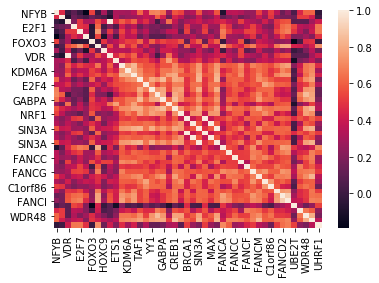

In [269]:
%matplotlib inline

another = new_norm[['NFYB','CREM' , 'VDR', 'E2F1' ,'E2F7', 'FOXP3','FOXO3','FOXM1','HOXC9','VDR','ETS1','KDM5B' ,'KDM6A', 'KDM5A' , 'TAF1' , 'E2F4' ,'YY1' , 'ATF2' , 'GABPA' , 'ELF1' , 'CREB1' , 'NRF1' , 'BRCA1' , 'MAX' , 'SIN3A','BRCA1' , 'MAX' , 'SIN3A' , 'FANCA' , 'FANCB',  'FANCC' , 'FANCE' , 'FANCF' , 'FANCG' , 'FANCM' , 'C17orf70' , 'C1orf86' , 'C19orf40' , 'FANCD2' , 'FANCI' , 'UBE2T' , 'FANCL' , 'WDR48' , 'USP1' , 'UHRF1']]



sns.heatmap(another.corr())


















ValueError: operands could not be broadcast together with shapes (11688,) (2,) 

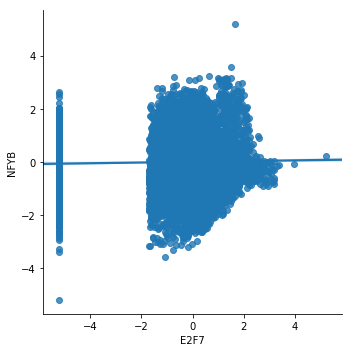

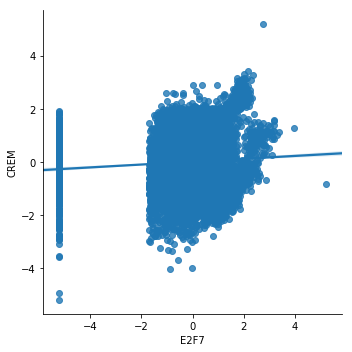

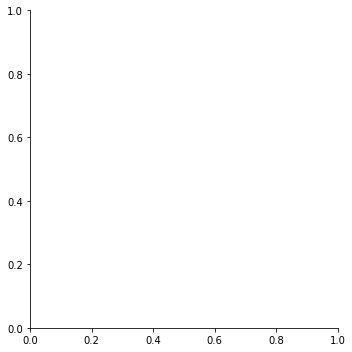

In [264]:
another = so_happy3[['NFYB','CREM' , 'VDR', 'E2F1' ,'E2F7', 'FOXP3','FOXO3','FOXM1','HOXC9','VDR','ETS1','KDM5B' ,'KDM6A', 'KDM5A' , 'TAF1' , 'E2F4' ,'YY1' , 'ATF2' , 'GABPA' , 'ELF1' , 'CREB1' , 'NRF1' , 'BRCA1' , 'MAX' , 'SIN3A','BRCA1' , 'MAX' , 'SIN3A' , 'FANCA' , 'FANCB',  'FANCC' , 'FANCE' , 'FANCF' , 'FANCG' , 'FANCM' , 'C17orf70' , 'C1orf86' , 'C19orf40' , 'FANCD2' , 'FANCI' , 'UBE2T' , 'FANCL' , 'WDR48' , 'USP1' , 'UHRF1']]

for i in range(0, len(another.columns)):
    sns.lmplot(another.columns[4] , another.columns[i] , data = another)

In [247]:
sns.scatterplot([data = another])

SyntaxError: invalid syntax (<ipython-input-247-68493eaf9464>, line 1)

In [42]:
another.to_csv('ok.txt' , sep = '\t')

In [ ]:
sns.clustermap(x , metric = 'correlation')

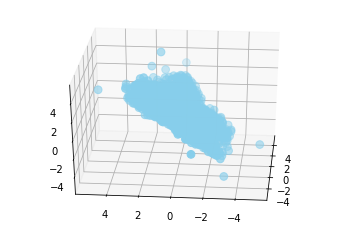

In [160]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(new_norm['FANCA'], new_norm['TAF1'], new_norm['SIN3A'], c='skyblue', s=60)
ax.view_init(30, 185)
plt.show()